# Task 13: California Housing dataset preprocessing 

###  
### 1. Importing the important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

###  
### 2. Loading the dataset

In [2]:
housing = pd.read_csv("/home/noura/Downloads/housing.csv")
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

###  
### 3. Getting some information about the dataset

In [3]:
#info about the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#the shape of the dataset
housing.shape

(20640, 10)

- The dataset has 20640 rows and 10 columns.

###  
### 4. Handling the missing values

In [5]:
#checking for the missing valeus
housing.isnull()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
20635      False     False               False        False           False   
20636      False     False               False        False           False   
20637      False     False               False        False           False   
20638      False     False               False        False           False   
20639      False     False               False        False           False   

       population  households  median_income  median_house_value  \
0           False       False          False               False   
1           False       False          False               False   
2           False       False          False               False   
3           False       False          False               False   
4           False       False          False               False   
...           ...         ...            ...                 ...   
20635       False       False          False               False   
20636       False       False          False               False   
20637       False       False          False               False   
20638       False       False          False               False   
20639       False       False          False               False   

       ocean_proximity  
0                False  
1                False  
2                False  
3                False  
4                False  
...                ...  
20635            False  
20636            False  
20637            False  
20638            False  
20639            False  

[20640 rows x 10 columns]

In [6]:
#getting the number of the missing values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

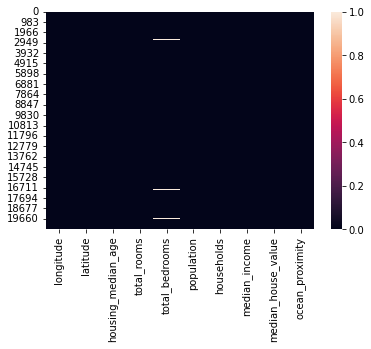

In [7]:
#Visualizing the missing values
sns.heatmap(housing.isnull(), cmap = "rocket")

####     
#### 4.1 Missing values in the total_bedrooms column

In [8]:
housing["total_bedrooms"].isnull().sum()

207

In [9]:
#The type of the data stored in the total_bedrooms
housing["total_bedrooms"]

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [10]:
#statistical information about the column
housing["total_bedrooms"].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

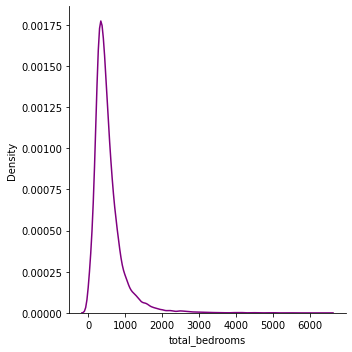

In [11]:
#checking the distribution of the data before any updates
sns.displot(housing, x="total_bedrooms", kind = "kde", color = 'Purple' )

In [12]:
#filling randomly
fill_list = housing["total_bedrooms"].dropna()
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(pd.Series(np.random.choice(fill_list, size = len(housing.index))))
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

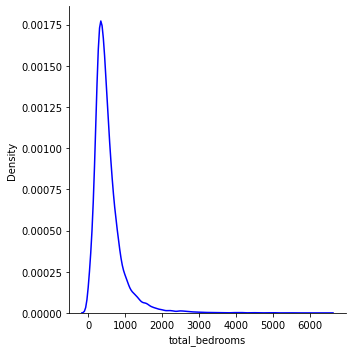

In [13]:
#checking the distribution of the data after filling the missing values
sns.displot(housing["total_bedrooms"], kind = "kde", color = 'Blue' )

- The distribution hasn't changed, so we are going to fill the missing values randomly.

In [14]:
#recheck the missing values after filling the missings
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

###  
### 5. Handling the outliers

####  5.1 house_median_age column

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

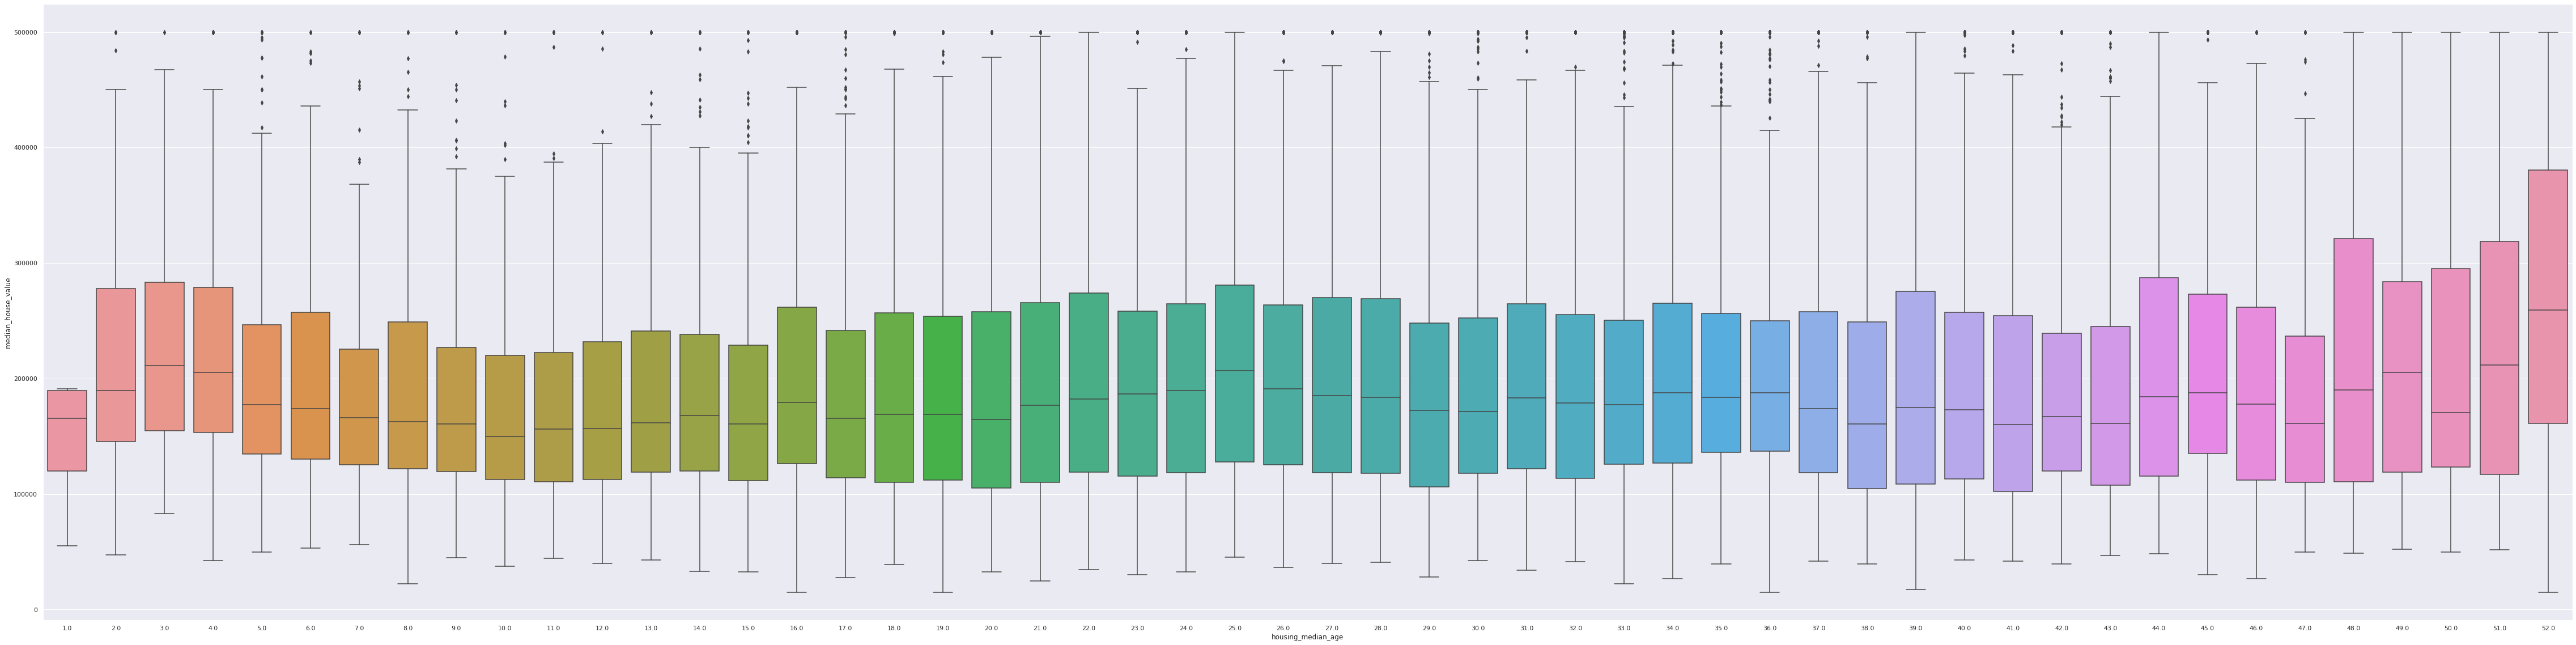

In [15]:
#Detecting the outliers using box and scatter plots
sns.set(rc = {'figure.figsize':(80,20)})
sns.boxplot(x="housing_median_age", y = "median_house_value", data = housing)

- This column has no outliers.

####   
#### 5.2 total_rooms column

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

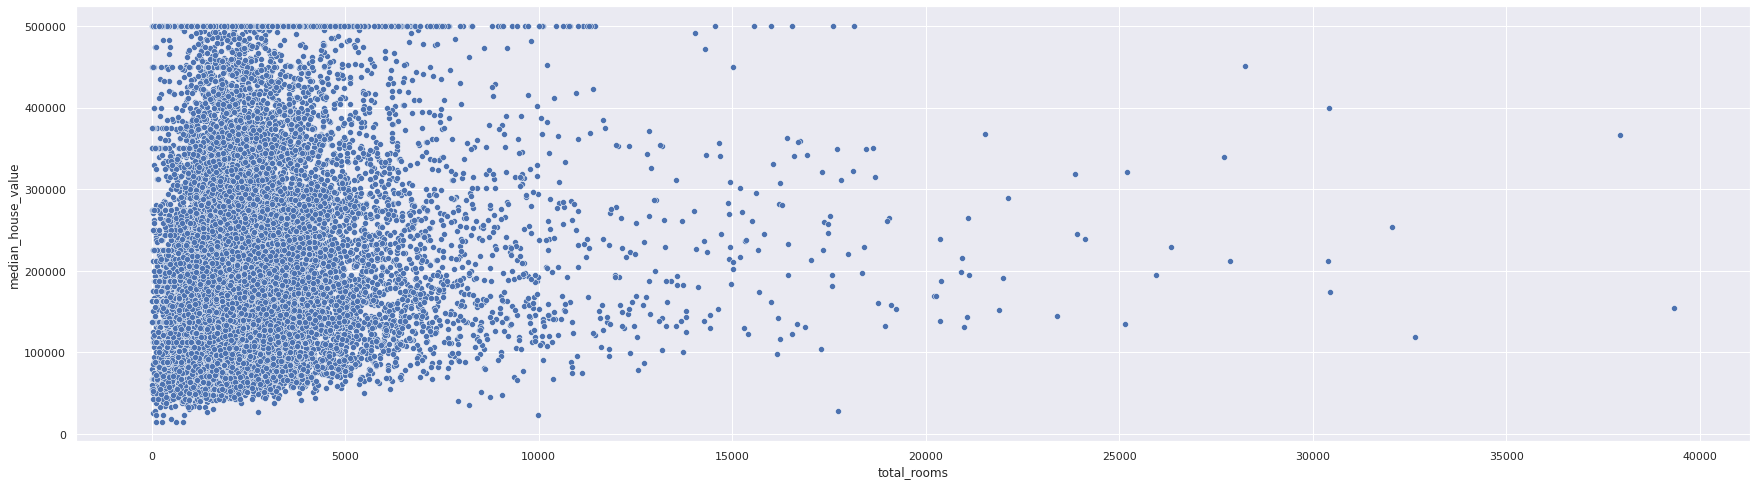

In [16]:
sns.set(rc = {'figure.figsize':(30,8)})
sns.scatterplot(x="total_rooms", y ="median_house_value", data = housing)

In [17]:
housing["total_rooms"].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [18]:
q1 = 1447.500000
q3 = 3148.000000
iqr = q3-q1
l = q1 -1.5*iqr
u = q3+1.5*iqr

In [19]:
#Handling the outliers in this column
housing = housing.loc[(housing["total_rooms"]<u)]
housing = housing.loc[(housing["total_rooms"]>l)] 
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
5           413.0       193.0         4.0368            269700.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
5            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[19353 rows x 10 columns]

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

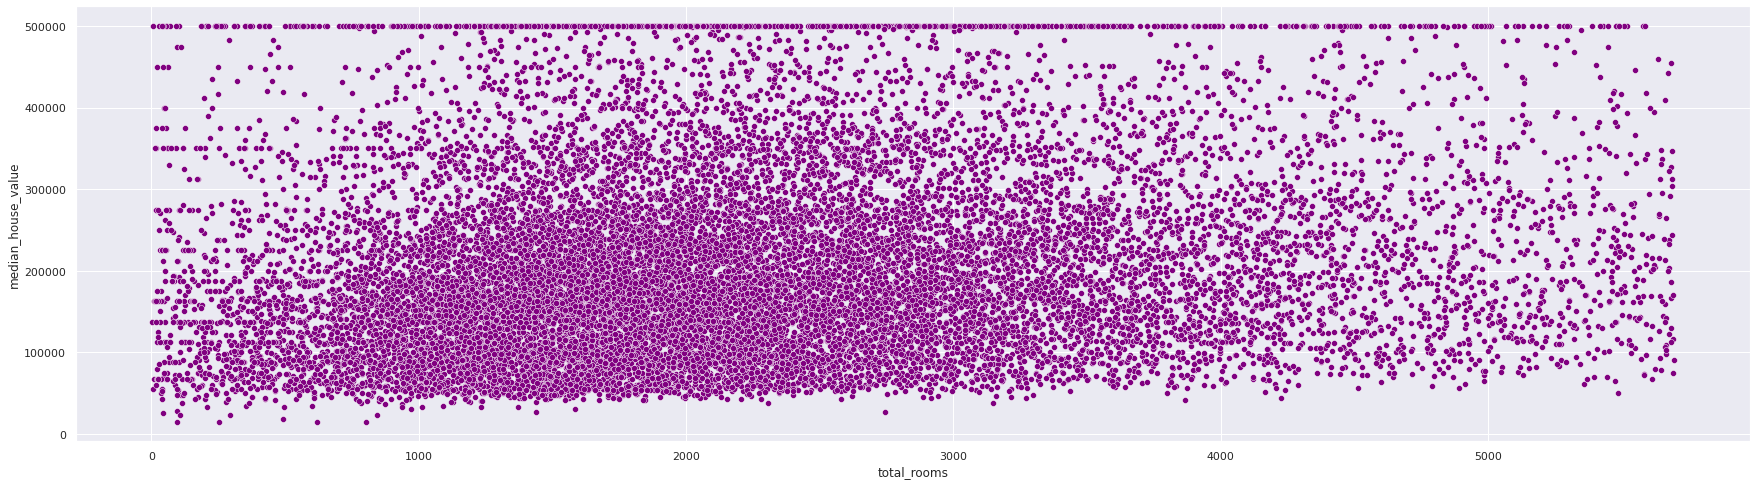

In [20]:
#scatter plot after handling the outliers
sns.scatterplot(x="total_rooms", y ="median_house_value", data = housing, color = "Purple")

- Now, the column has no outliers.

###   
#### 5.3 total_bedrooms column

<AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>

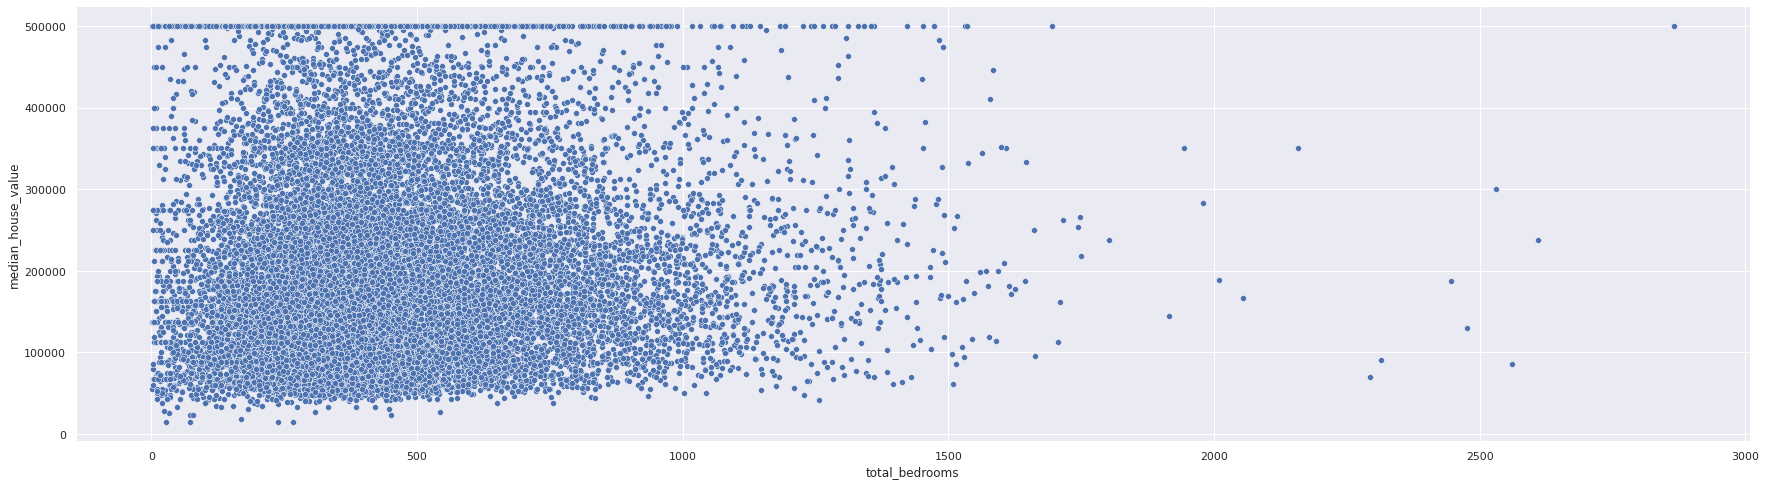

In [21]:
sns.scatterplot(x="total_bedrooms", y ="median_house_value", data = housing)

In [22]:
housing["total_bedrooms"].describe()

count    19353.000000
mean       464.232057
std        256.815645
min          1.000000
25%        288.000000
50%        416.000000
75%        595.000000
max       2865.000000
Name: total_bedrooms, dtype: float64

In [23]:
q1 = 288.000000
q3 = 595.000000
iqr = q3-q1
l = q1 -1.5*iqr
u = q3+1.5*iqr

In [24]:
#Handling the outliers in this column
housing = housing.loc[(housing["total_bedrooms"]<u)]
housing = housing.loc[(housing["total_bedrooms"]>l)] 
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
5           413.0       193.0         4.0368            269700.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
5            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[18786 rows x 10 columns]

<AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>

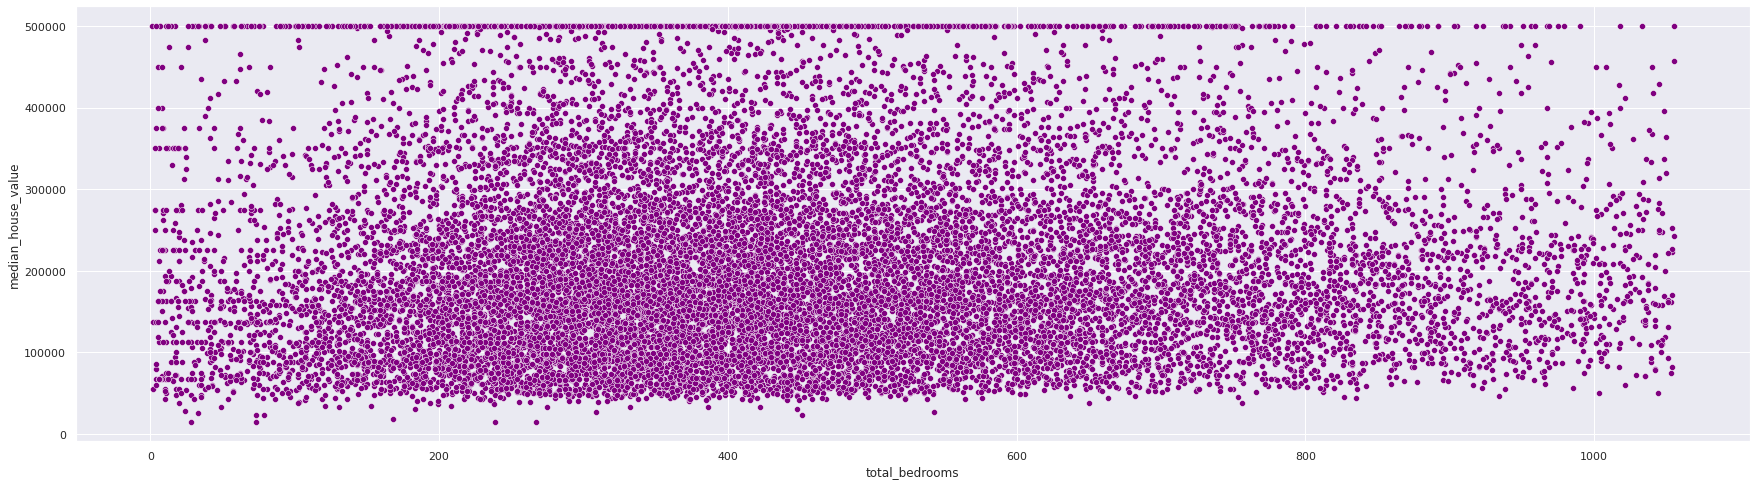

In [25]:
#scatter plot after handling the outliers
sns.scatterplot(x="total_bedrooms", y ="median_house_value", data = housing, color = "Purple" )

- Now, the column has no outliers.

####     
#### 5.4 population column

<AxesSubplot:xlabel='population', ylabel='median_house_value'>

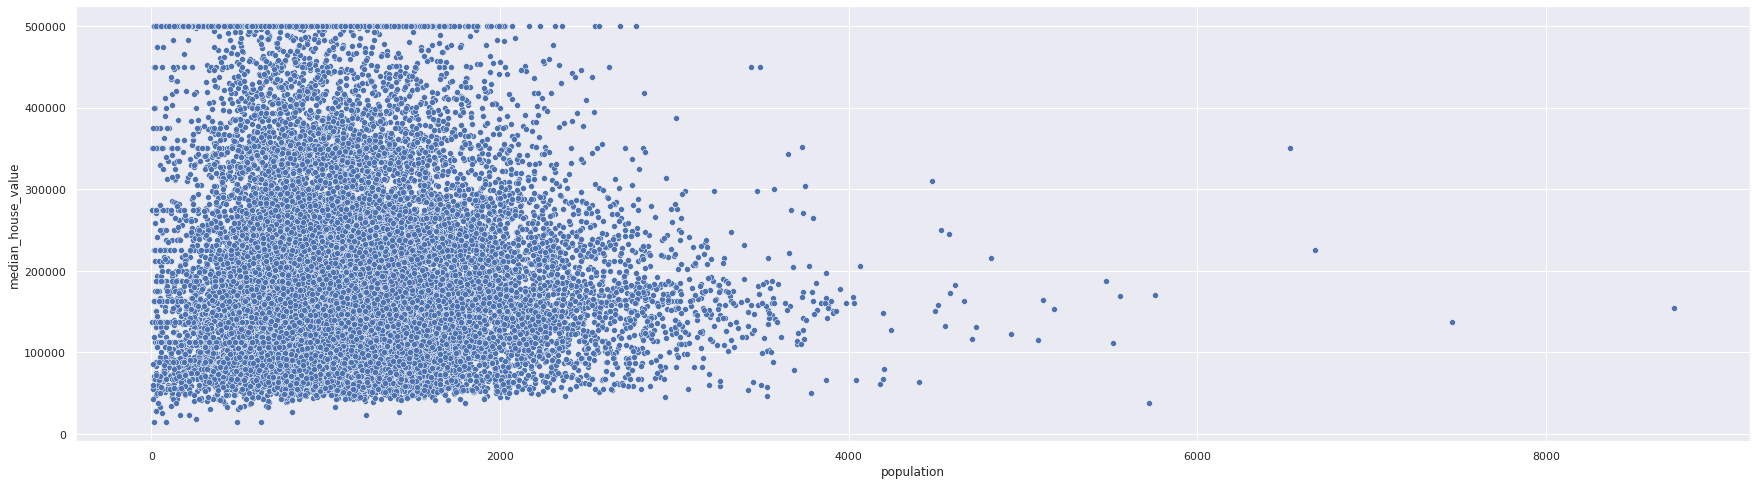

In [26]:
sns.scatterplot(x="population", y ="median_house_value", data = housing)

In [27]:
housing["population"].describe()

count    18786.000000
mean      1199.810444
std        648.731590
min          3.000000
25%        755.000000
50%       1097.000000
75%       1543.000000
max       8733.000000
Name: population, dtype: float64

In [28]:
q1 = 755.000000
q3 = 1543.000000
iqr = q3-q1
l = q1 -1.5*iqr
u = q3+1.5*iqr

In [29]:
#Handling the outliers in this column
housing = housing.loc[(housing["population"]<u)]
housing = housing.loc[(housing["population"]>l)] 
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
5           413.0       193.0         4.0368            269700.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
5            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[18297 rows x 10 columns]

<AxesSubplot:xlabel='population', ylabel='median_house_value'>

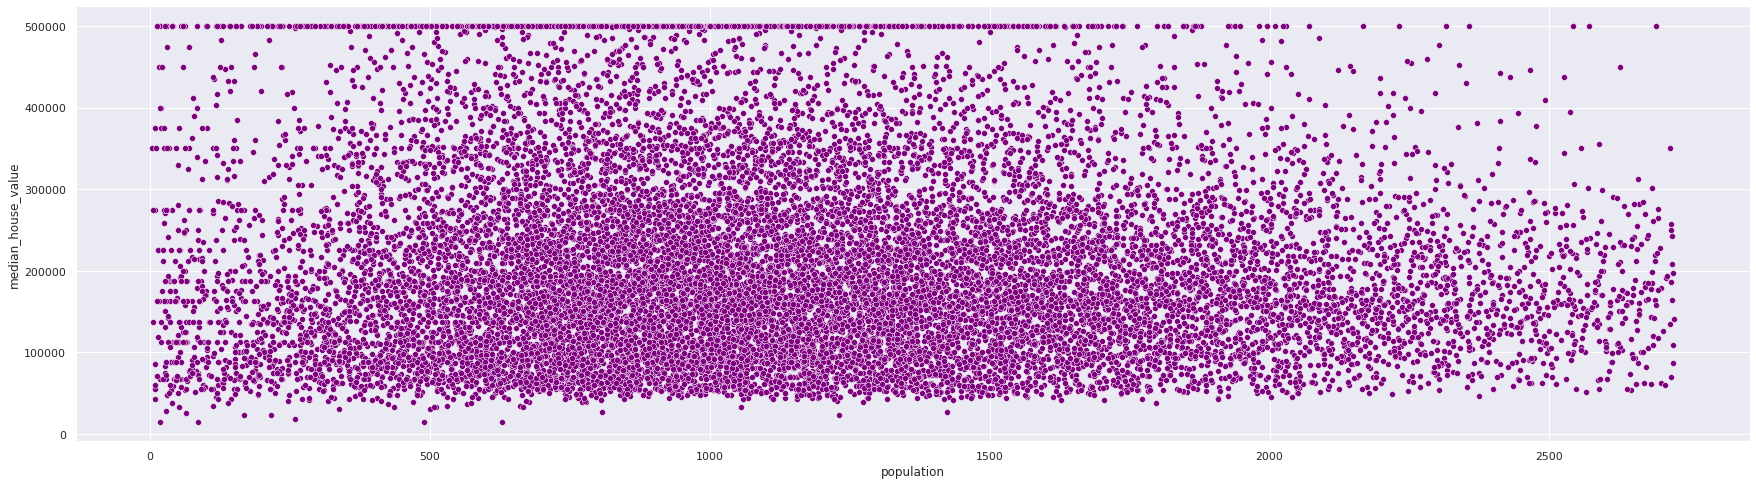

In [30]:
#scatter plot after handling the outliers
sns.scatterplot(x="population", y ="median_house_value", data = housing, color = "Purple" )

- Now, the column has no outliers.

####  
#### 5.5 households column

<AxesSubplot:xlabel='households', ylabel='median_house_value'>

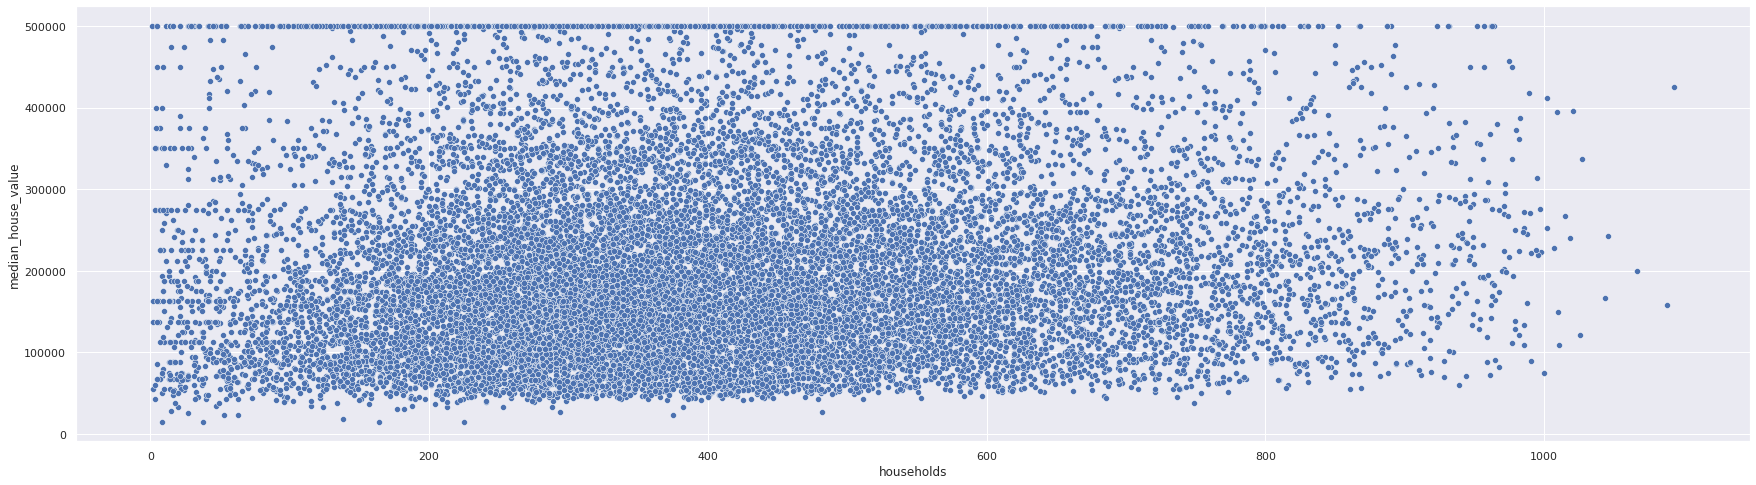

In [31]:
sns.scatterplot(x="households", y ="median_house_value", data = housing)

In [32]:
housing["households"].describe()

count    18297.000000
mean       403.272121
std        193.483865
min          1.000000
25%        267.000000
50%        379.000000
75%        524.000000
max       1093.000000
Name: households, dtype: float64

In [33]:
q1 = 267.000000
q3 = 524.000000
iqr = q3-q1
l = q1 -1.5*iqr
u = q3+1.5*iqr

In [34]:
#Handling the outliers
housing = housing.loc[(housing["households"]<u)]
housing = housing.loc[(housing["households"]>l)] 
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
5           413.0       193.0         4.0368            269700.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
5            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[18113 rows x 10 columns]

<AxesSubplot:xlabel='households', ylabel='median_house_value'>

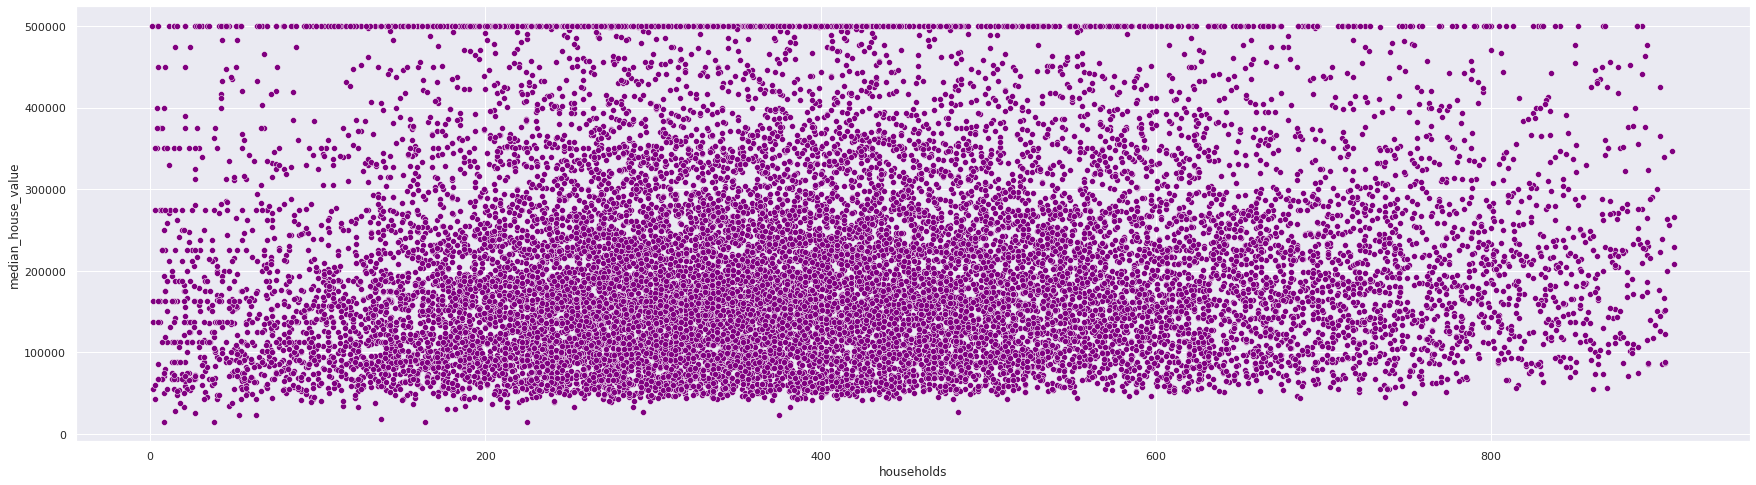

In [35]:
#scatter plot after handling the outliers
sns.scatterplot(x="households", y ="median_house_value", data = housing, color = "Purple")

- Now, the column has no outliers.

####    
#### 5.6 median_income column

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

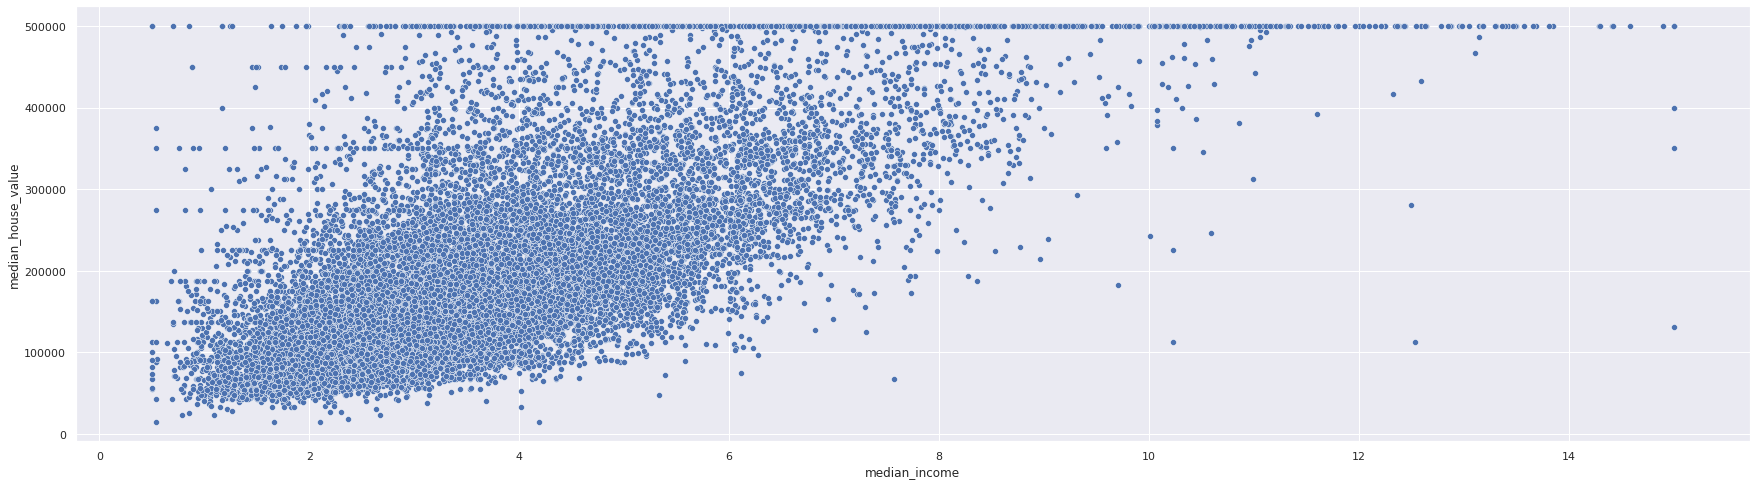

In [36]:
sns.scatterplot(x='median_income', y="median_house_value", data = housing)

In [37]:
housing["median_income"].describe()

count    18113.000000
mean         3.859209
std          1.913518
min          0.499900
25%          2.544400
50%          3.527000
75%          4.736100
max         15.000100
Name: median_income, dtype: float64

In [38]:
q1 = 2.543700
q3 = 4.736400
iqr = q3-q1
l = q1 -1.5*iqr
u = q3+1.5*iqr

In [39]:
#Handling the outliers in this column
housing = housing.loc[(housing["median_income"]<u)]
housing = housing.loc[(housing["median_income"]>l)] 
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
5           413.0       193.0         4.0368            269700.0   
6          1094.0       514.0         3.6591            299200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
5            NEAR BAY  
6            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[17524 rows x 10 columns]

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

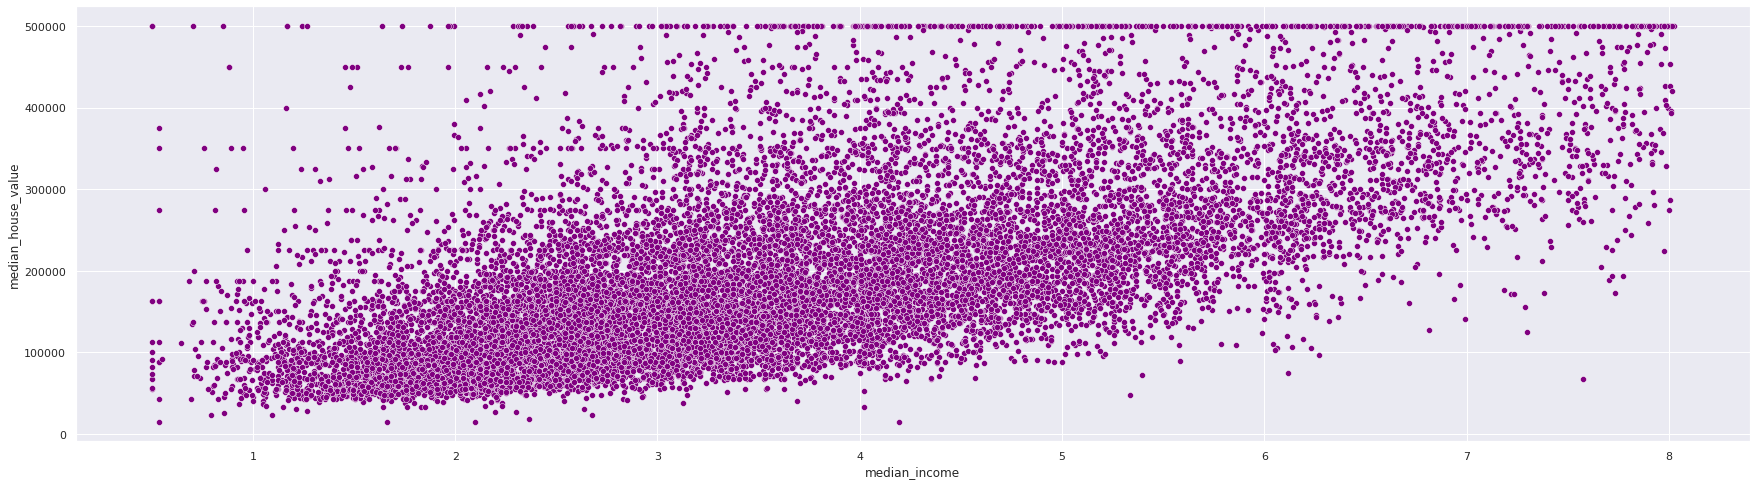

In [40]:
#scatter plot after handling the outliers
sns.scatterplot(x="median_income", y ="median_house_value", data = housing, color = "Purple" )

- Now, the column has no outliers.

####   
### 6. Encoding

In [41]:
ocean_proximity_le = LabelEncoder()

In [42]:
housing["ocean_proximity"] = ocean_proximity_le.fit_transform(housing['ocean_proximity'])
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
5           413.0       193.0         4.0368            269700.0   
6          1094.0       514.0         3.6591            299200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity  
2                    3  
3                    3  
4                    3  
5                    3  
6                    3  
...                ...  
20635                1  
20636                1  
20637                1  
20638                1  
20639                1  

[17524 rows x 10 columns]

####  
### 7. Train test split

In [43]:
housing1 = housing.iloc[:,2:-1]
housing1

housing_median_age  total_rooms  total_bedrooms  population  \
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
5                    52.0        919.0           213.0       413.0   
6                    52.0       2535.0           489.0      1094.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  median_house_value  
2           177.0         7.2574            352100.0  
3           219.0         5.6431            341300.0  
4           259.0         3.8462            342200.0  
5           193.0         4.0368            269700.0  
6           514.0         3.6591            299200.0  
...           ...            ...                 ...  
20635       330.0         1.5603             78100.0  
20636       114.0         2.5568             77100.0  
20637       433.0         1.7000             92300.0  
20638       349.0         1.8672             84700.0  
20639       530.0         2.3886             89400.0  

[17524 rows x 7 columns]

In [44]:
x = housing1.drop("median_house_value", axis = 1).values
x

array([[5.2000e+01, 1.4670e+03, 1.9000e+02, 4.9600e+02, 1.7700e+02,
        7.2574e+00],
       [5.2000e+01, 1.2740e+03, 2.3500e+02, 5.5800e+02, 2.1900e+02,
        5.6431e+00],
       [5.2000e+01, 1.6270e+03, 2.8000e+02, 5.6500e+02, 2.5900e+02,
        3.8462e+00],
       ...,
       [1.7000e+01, 2.2540e+03, 4.8500e+02, 1.0070e+03, 4.3300e+02,
        1.7000e+00],
       [1.8000e+01, 1.8600e+03, 4.0900e+02, 7.4100e+02, 3.4900e+02,
        1.8672e+00],
       [1.6000e+01, 2.7850e+03, 6.1600e+02, 1.3870e+03, 5.3000e+02,
        2.3886e+00]])

In [45]:
y = housing1["median_house_value"].values
y

array([352100., 341300., 342200., ...,  92300.,  84700.,  89400.])

In [46]:
#splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 42)

In [47]:
x_train

array([[1.7000e+01, 2.9610e+03, 6.3400e+02, 1.9110e+03, 6.1500e+02,
        2.5859e+00],
       [3.8000e+01, 2.0100e+03, 5.9500e+02, 1.5350e+03, 5.2500e+02,
        1.9848e+00],
       [3.7000e+01, 1.6380e+03, 4.0700e+02, 1.3410e+03, 3.6900e+02,
        3.0677e+00],
       ...,
       [3.4000e+01, 2.0500e+03, 4.9500e+02, 1.8320e+03, 4.6500e+02,
        2.8333e+00],
       [2.5000e+01, 2.2440e+03, 3.0100e+02, 9.3700e+02, 3.2400e+02,
        6.4524e+00],
       [4.4000e+01, 1.6250e+03, 3.9200e+02, 9.4400e+02, 3.4700e+02,
        1.5972e+00]])

In [48]:
x_test

array([[3.7000e+01, 4.9430e+03, 8.5100e+02, 2.1640e+03, 7.8800e+02,
        4.1071e+00],
       [2.4000e+01, 3.4090e+03, 8.0400e+02, 1.9390e+03, 7.3900e+02,
        1.7303e+00],
       [3.5000e+01, 2.6030e+03, 4.8200e+02, 1.3050e+03, 5.0700e+02,
        3.9543e+00],
       ...,
       [2.6000e+01, 2.0120e+03, 3.1500e+02, 8.7200e+02, 3.3500e+02,
        5.4067e+00],
       [3.2000e+01, 2.7230e+03, 6.3700e+02, 1.5490e+03, 5.5600e+02,
        2.3942e+00],
       [3.0000e+01, 1.4610e+03, 3.4100e+02, 1.0140e+03, 3.4500e+02,
        2.4667e+00]])

In [49]:
y_train

array([131400., 160400., 167700., ..., 155700., 296900.,  68900.])

In [50]:
y_test

array([311300.,  74000., 214400., ..., 277500., 183100., 106000.])

####  
### 8. Scaling the data using Robust Scaler

In [51]:
ro_scaler = RobustScaler()

In [52]:
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

###  
### 9. Building Regression models

####  
#### 9.1 Linear Regression model

In [53]:
lin_reg = linear_model.LinearRegression()
#training process
lin_reg.fit(x_train, y_train)

LinearRegression()

In [54]:
#the accuracy of the training process
lin_reg.score(x_train, y_train)

0.5452689238769157

In [55]:
#the accuracy of the testing process
lin_reg.score(x_test, y_test)

0.5462336778758425

In [56]:
lin_reg.intercept_

188322.77445296446

In [57]:
lin_reg.coef_

array([ 32012.81609687, -61461.05487717,  51113.69077416, -57291.68518674,
        72309.64484717, 116397.12918526])

In [58]:
pd.DataFrame(lin_reg.coef_, housing1.columns[:-1], columns = ["coefficient"])

coefficient
housing_median_age   32012.816097
total_rooms         -61461.054877
total_bedrooms       51113.690774
population          -57291.685187
households           72309.644847
median_income       116397.129185

In [59]:
y_pred1 = lin_reg.predict(x_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": y_pred1})
df_out.head()

y_test         y_pred
0  311300.0  211451.119962
1   74000.0  121292.064878
2  214400.0  225840.120203
3  174300.0  100953.652897
4   57500.0   92263.764697

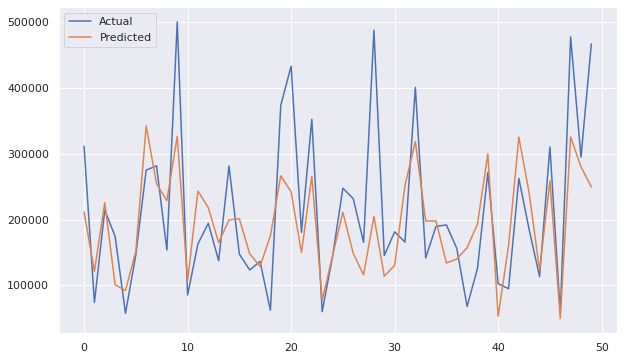

In [60]:
plt.figure(figsize=(10,6))
plt.plot(df_out[:50])
plt.legend(["Actual", "Predicted"])

####  
#### 9.2 Ridge model

In [61]:
rid_reg = linear_model.Ridge(alpha = 0.4)
#training process
rid_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [62]:
#the accuracy of the training process
rid_reg.score(x_train, y_train)

0.5452688962087098

In [63]:
#the accuracy of the testing process
rid_reg.score(x_test, y_test)

0.5462286204834446

In [64]:
rid_reg.intercept_

188323.68738690065

In [65]:
rid_reg.coef_

array([ 32013.84122357, -61409.08123852,  51095.08934139, -57273.0891373 ,
        72261.50735038, 116375.77635064])

In [66]:
pd.DataFrame(rid_reg.coef_, housing1.columns[:-1], columns = ["coefficient"])

coefficient
housing_median_age   32013.841224
total_rooms         -61409.081239
total_bedrooms       51095.089341
population          -57273.089137
households           72261.507350
median_income       116375.776351

In [67]:
y_pred2 = rid_reg.predict(x_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": y_pred2})
df_out.head()

y_test         y_pred
0  311300.0  211483.160365
1   74000.0  121294.084534
2  214400.0  225838.564597
3  174300.0  100972.001763
4   57500.0   92280.779279

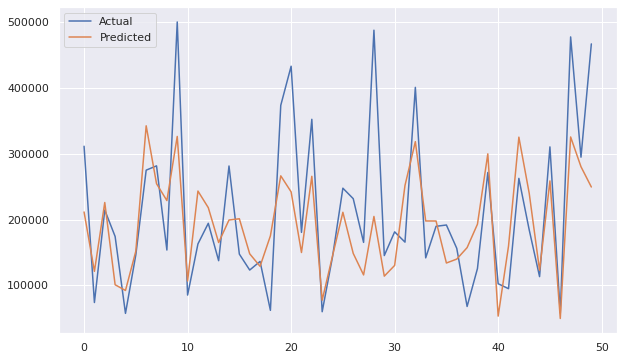

In [68]:
plt.figure(figsize=(10,6))
plt.plot(df_out[:50])
plt.legend(["Actual", "Predicted"])

####  
#### 9.3 Lasso model

In [69]:
las_reg = linear_model.Lasso(alpha = 0.9)
#Training process
las_reg.fit(x_train, y_train)

Lasso(alpha=0.9)

In [70]:
#the accuracy of the training process
las_reg.score(x_train, y_train)

0.5452689186317803

In [71]:
#the accuracy of the testing process
las_reg.score(x_test, y_test)

0.5462315292446787

In [72]:
las_reg.intercept_

188323.10199250997

In [73]:
las_reg.coef_

array([ 32012.02249994, -61439.21266402,  51100.45312608, -57282.49612506,
        72293.15728479, 116388.73917789])

In [74]:
pd.DataFrame(las_reg.coef_, housing1.columns[:-1], columns = ["coefficient"])

coefficient
housing_median_age   32012.022500
total_rooms         -61439.212664
total_bedrooms       51100.453126
population          -57282.496125
households           72293.157285
median_income       116388.739178

In [75]:
y_pred3 = las_reg.predict(x_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": y_pred3})
df_out.head()

y_test         y_pred
0  311300.0  211463.517569
1   74000.0  121291.836911
2  214400.0  225840.032366
3  174300.0  100960.441342
4   57500.0   92271.416758

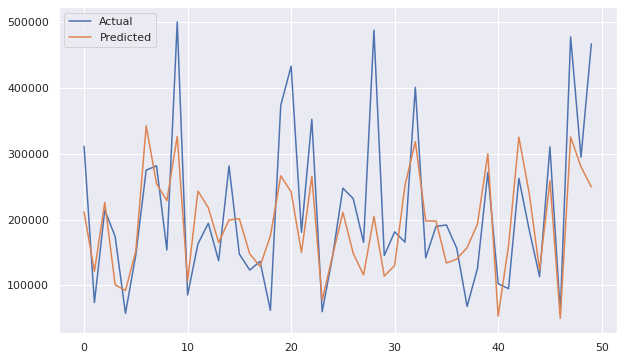

In [76]:
plt.figure(figsize=(10,6))
plt.plot(df_out[:50])
plt.legend(["Actual", "Predicted"])

###  
### 10. Models evaluation

###   
#### 10.1 Linear Regression model evalution

In [77]:
#R-squared for the linear regression model
lin_reg_score = r2_score(y_test, y_pred1)
lin_reg_score

0.5462336778758425

In [78]:
#Adjust R-squared for the linear regression model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1-(1-lin_reg_score)*(n-1)/(n-p-1)
adj_r2

0.546039373141847

In [79]:
#mean squared error
lin_mse = mean_squared_error(y_test, y_pred1)
lin_mse

5296198886.488135

In [80]:
#mean absolute percentage error
lin_mape = mean_absolute_percentage_error(y_test, y_pred1)
lin_mape

0.3391714466066055

####  
#### 10.2 Ridge model evaluation

In [81]:
#R-squared for the linear regression model
rid_reg_score = r2_score(y_test, y_pred2)
rid_reg_score

0.5462286204834446

In [82]:
#Adjust R-squared for the linear regression model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1-(1-rid_reg_score)*(n-1)/(n-p-1)
adj_r2

0.5460343135838515

In [83]:
#mean squared error
rid_mse = mean_squared_error(y_test, y_pred2)
rid_mse

5296257914.570829

In [84]:
#mean absolute percentage error
rid_mape = mean_absolute_percentage_error(y_test, y_pred2)
rid_mape

0.3391816435695687

###   
#### 10.3 Lasso model evaluation

In [85]:
#R-squared for the lasso model
las_reg_score = r2_score(y_test, y_pred3)
las_reg_score

0.5462315292446787

In [86]:
#Adjust R-squared for the lasso model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1-(1-las_reg_score)*(n-1)/(n-p-1)
adj_r2

0.5460372235906299

In [87]:
#mean squared error
las_mse = mean_squared_error(y_test, y_pred3)
las_mse

5296223964.545767

In [88]:
#mean absolute percentage error
las_mape = mean_absolute_percentage_error(y_test, y_pred3)
las_mape

0.3391744834446709

####    
- NOTE: Error percentage is expected to be a big number as we are using linear models with non-linear dataset.